# COGS 118A - Project Checkpoint

# Names

- Keri Chen
- Arth Shukla
- WonJae Lee
- Ashley Chu
- Cynthia Delira

# Abstract 
Real estate is the foundation for many life milestones like owning a home, starting a family or a business, and more. However, it may be hard to break into the real estate world without first doing a lot of research and planning because real estate is after all, an investment. By building a ML model that helps predict the price of home, this can hopefully help to make the process easier for prospective homeowners and sellers. The data we will be using encompasses 5+ million Russian real estate sales from 2018 - 2021 and has multiple variables. Although our dataset is in the Russian market, it provides us a lot of data points that can allow us to learn more about the different models and generalize it to different markets.

We will perform some EDA analysis to view the correlation of the different factors, and then build a linear regression model using CART regression, logistic regression, and random forest. We will then evaluate the performance of our model using mean absolute error (MAE).

# Background

The real estate market has been a pivotal factor and contributor in the economy as according to the National Association of Home Builders, housing’s combined contribution to gross domestic product (GDP) generally averages 15-18%<a name="nahb"></a>[<sup>[1]</sup>](#nahb). This percentage is calculated based on both residential investment as well as consumption spending on housing. Not only is housing a contributor to the economy but it is also an important asset to people’s lives as it not only signifies having a place to sleep in but is often perceived as a way to show one’s social status and a valuable asset where money can be allocated.


Despite the importance and high contribution that the market is to the economy, it has many factors that can quickly change the market. Although different factors can influence the real-estate market, one of the most important factors is demographics<a name="keyfactors"></a>[<sup>[2]</sup>](#keyfactors).

Demographics consists of the data of the population near the location which affects the pricing of the house and also the demand the property has. Places in and near a major city could be more expensive due the proportion of square footage and price<a name="demographics">,</a>[<sup>[3]</sup>](#demographics) since major cities usually have limited land to be developed or already has no more space for new developments. Alhtough real-estate predictions across different areas (urban, rural, suburban) can very due to differences in land use, when considering a single location (e.g. one city) where land use, housing supply, etc are more similar, demographics prevail as the key difference when comparing real estate.

Our exploration will, therefore, focus on Moscow, the capital of Russia which has a quickly-growing real estate market. Because the market is developing, it can be difficult for the average person to determine which variables contribute most to real estate pricing. By building a model to predict real estate pricing (in rubles), we aim to make distilling this demographic information easier on a larger scale.

There has been a lot of prior (and ongoing) research within the real estate industry, especially real estate companies such as Zillow with their “Neural Zestimate,”<a name="Zestimate"></a>[<sup>[4]</sup>](#Zestimate). Redfin with their “Redfin Estimate,”<a name="Redfin"></a>[<sup>[5]</sup>](#Redfin). and many other real estate companies also have their own models for estimating home prices. Since each model is built differently, this leads to varying price estimations. However, the basis of the models are similar as it takes in large amounts of previous transactions and/or MLS data to get various variables to find good features to base the model off of as it keeps retraining to get better results.  

# Problem Statement

The real estate market can be a turbulent and rapidly changing environment, where it is often hard to predict the actual value of the home, as opposed to high prices due to supply and demand, or other factors which may artificially increase home prices. We aim to make it easier for people to get this type of information by training a ML model on a large dataset of previous home purchases in order to predict what price point a home may be at. 

# Data

Our current best candidate is the following dataset of <a href="https://www.kaggle.com/datasets/mrdaniilak/russia-real-estate-20182021">Russian Real Estate pricing from 2018-2021.</a> The dataset contains an incredible 5 million+ data points, with no null values and only a few thousand duplicate rows. Therefore, our data is very-well poised to avoid generalization without uses of techniques like cross-validation.

This massive dataset means training could takes many days or even weeks given our computational resources, which is not feasible. However, our exploration focuses primarily on Moscow, since demographics data can vary between cities/counties. Thus, we are able to limit the size of our data to about 1/10th of the original dataset. Furthermore, if computational cost continues to be an issue, we may randomly sample a subset of our data to train (this will not harm any assumptions for the regression models we will use, since it does not violate any assumptions about the data which these models require)

There are 13 variables, 2 categorical, 2 location-based, and the rest ordinal. We will be removing the latitude and longitude columns as these prevent ethical issues regarding the location of homeowners and intense violations of privacy.

Each observation contains the price of a house, listing date and time, geographic location, region, and information about the building (type, storeys, floor, living rooms, rooms). Notably, it does not contain square footage, which is a landmark in much of the American real estate market.

Critical variables mostly encompass the house descriptions and the time of publishing. We will need to one-hot encode building type. We may split the data by region, in which case we will not need to one-hot encode, but if we decide not to split, then we will need to one-hot encode this as well. Building type will not largely increase the width of the design matrix, but region likely will, so it is preferred not to use the region for non-tree regression models.

Finally, we will need to convert data and time of publication to only the year, and potentially also the month, in case we’d like to do time series analysis. As mentioned earlier, we’ll also remove the latitude and longitude due to concerns of privacy. Finally, for our non-tree models, we will also normalize our data points by z-score, since data like price in rubles will be orders of magnitude larger than number of rooms.

# Proposed Solution

Note that we discuss error metrics, including justifications for L1 loss (MAE), in the Evaluation Metrics section.

Before discussing our implementation, regarding benchmark models: there are some models available on Kaggle using time series analysis, which might result in good outputs. However, there are no significant authorities on Russian real estate pricing in machine learning, especially since this is an emerging market. Furthermore, American authorities on real estate prediction often keep their models internal as a part of their business model, so it is difficult to use existing robust benchmark models without apis and the sort.
First, it is important to note that our dataset is massive. With over 5 million samples, our model will certainly generalize well, but this also means we may have too many confounding variables and our model may not reach high enough MAE. During EDA, we will determine cities which contain interesting data, and we can fragment our data by city. Depending on computational resources and time constraints, we may choose multiple cities, or only use one.

Second, regardless of which or how many cities we use, this data is simply far too massive for any form of CV. Additionally, CV is not necessary here, since our validation set is likely to generalize well.
Finally, luckily much of the data is ordinal, with few categorical variables with limited possible values. For our regression models, we may try to avoid extra data points such that we don’t have too many features in our design matrix. However, to attempt to include these features in at least one model, we will also try random forests.

- CART Regression
- Linear regression using L1 loss
- After performing EDA, if certain metrics seem like they could use polynomial features, we can also try polynomial regression using L1 loss.
- Random Forests to include categorical variables.


We can also try variants of linear and polynomial regression using L2 regularization. It is unlikely that many of these features will be confounding (though we can confirm with EDA), so L2 regularization is likely more reasonable. We can also try mixed regularization in case some features are, indeed, confounding.

Then, if we have enough computational resources, we can perform grid search on different hyperparameters for model selection. However, if this is not feasible, we can empirically justify pruning techniques, regularization mix, etc.

Finally, we will use sklearn for all implementations for 1) readable code, and 2) efficient, thoroughly tested implementations of the algorithms discussed above. While tools like Keras do have gpu acceleration, these methods aren’t as useful for our models as compared to neural network models.


# Evaluation Metrics

The three most common metrics for regression are mean squared error (MSE), mean absolute error (MAE) and root mean squared error (RMSE). MSE and RMSE heavily penalize outliers, while MAE proportionately penalizes all errors. Our data includes some more extreme outliers (10 living rooms, 39th floor, etc). For these ‘extreme’ sorts of houses, there are also many extra possible factors beyond measurable features like number of rooms; for example, the ‘art’ of designing expensive homes with luxury features. So, using MSE or RMSE would likely bias our model to these extreme outliers while lowering our model’s success in gauging prices for a majority of houses on the market. Conversely, MAE would result in a better representation of the data for a majority of ‘normal’ cases. Therefore, we will stick to MAE.


# Preliminary results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



## Setup and Load Data

First, we retrieve the dataset from https://www.kaggle.com/datasets/mrdaniilak/russia-real-estate-20182021.

If using the below cell, make sure you have a Kaggle API token in a `kaggle.json` file in `~/.kaggle/`. Otherwise, please download the data manually and place it under a folder `./data/`.

Because the data file is very big, we will just upload the Moscow file that we have cleaned from the original dataset. But we will include the steps we have used to clean the original data file to get the data from Moscow.

In [3]:
#!mkdir data
#!kaggle datasets download mrdaniilak/russia-real-estate-20182021
#!mv ./russia-real-estate-20182021.zip ./data/russia-real-estate-20182021.zip

In [4]:
#import zipfile
#with zipfile.ZipFile('./data/russia-real-estate-20182021.zip', 'r') as zip_ref:
#    zip_ref.extractall('./data')

Now, we may proceed with exploration.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
"""
DATA_CSV_PATH = './data/all_v2.csv'

# load csv data
df = pd.read_csv(DATA_CSV_PATH)

# remove duplicate data
df = df.drop_duplicates()
"""

"\nDATA_CSV_PATH = './data/all_v2.csv'\n\n# load csv data\ndf = pd.read_csv(DATA_CSV_PATH)\n\n# remove duplicate data\ndf = df.drop_duplicates()\n"

Note that this Kaggle Dataset was originally pulled from GeoNames (http://www.geonames.org/), which has its own "regions" separated by county. Our city of interest, Moscow, has ID 81.

Addtionally, we will give categorical data appropriate labels given by the dataset spec.

In [ ]:
"""
MOSCOW_CODE = 81

moscow_df = df.loc[df['region'] == MOSCOW_CODE]
moscow_df = moscow_df.drop(['time', 'geo_lat', 'geo_lon', 'region'], axis=1)
moscow_df['date'] = moscow_df['date'].apply(lambda x: int(x[:4]))

moscow_df['object_type'] = moscow_df['object_type'].replace(1, 'preowned').replace(11, 'new')
moscow_df['building_type'] = moscow_df['building_type'].replace(0, 'other').replace(1, 'panel').replace(2, 'monolithic').replace(3, 'brick').replace(4, 'blocky').replace(5, 'wooden')

# -1 means studio apartment, so we replace with 0 (since studio apartments have no extra rooms)
# there are not other datapoints with value 0
moscow_df['rooms'] = moscow_df['rooms'].replace(-1, 0)

# remove rows with errorneous data
moscow_df = moscow_df[moscow_df['price'] >= 0]
moscow_df = moscow_df[moscow_df['rooms'] >= 0]
"""

In [11]:
moscow_df = pd.read_csv('data/Moscow.csv')

In [12]:
moscow_df.isnull().values.any()

False

In [ ]:
moscow_df.sample(5)

,price,date,building_type,level,levels,rooms,area,kitchen_area,object_type
933739,3500000,2019,panel,1,5,3,68.0,9.0,preowned
2952538,1200000,2019,brick,1,5,1,29.9,6.1,preowned
4342251,7590000,2020,monolithic,17,17,3,82.6,12.0,preowned
821729,7499000,2018,panel,2,17,3,88.0,12.0,preowned
989012,2844885,2019,monolithic,10,17,1,31.7,9.6,new


# Exploration

First, we'll look at the data distributions for the ordinal data.

In [ ]:
moscow_df.describe()

,price,date,level,levels,rooms,area,kitchen_area
count,5.001920e+05,500192.000000,500192.00000,500192.000000,500192.000000,500192.000000,500192.000000
mean,4.765453e+06,2019.310803,7.05152,12.741489,1.782240,51.734531,10.364580
std,4.208466e+06,0.880217,5.71243,7.391100,0.864063,25.727061,7.177274
min,0.000000e+00,2018.000000,1.00000,1.000000,0.000000,1.000000,0.050000
25%,3.000000e+06,2019.000000,3.00000,5.000000,1.000000,38.000000,7.000000
50%,4.300000e+06,2019.000000,5.00000,12.000000,2.000000,46.200000,9.600000
75%,5.950000e+06,2020.000000,10.00000,17.000000,2.000000,62.000000,12.000000
max,2.147484e+09,2021.000000,36.00000,39.000000,9.000000,5000.000000,3000.000000


Each column is skewed right, meaning we have some extreme outliers for each column. This is because in the real estate market, while most "normal" places have a similar price, the price ceiling for real estate can be very high. While these outliers are sparse, they could still bias our model.

Next, we can plot each variable against price to look for possible correlations. We will only looks at data points with price less than $2 \cdot 10^7$ to get better plots by removing price outliers. We will also plot regression lines for each to quantify per-variable correlation strength.

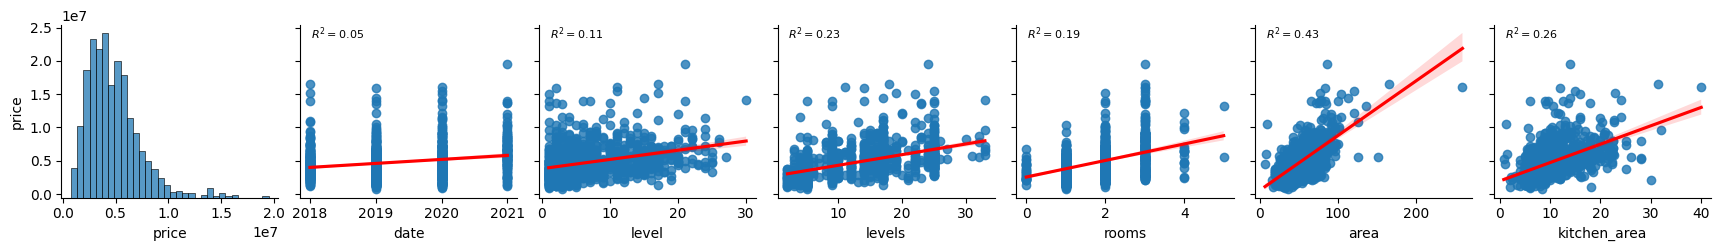

In [ ]:
from scipy.stats import linregress

def calc_R2(x, y, ax=None, **kwargs):
    ax = ax or plt.gca()
    _, _, r_value, _, _ = linregress(x=x, y=y)
    ax.annotate(f'$R^2 = {r_value ** 2:.2f}$', xy=(.05, 1), xycoords=ax.transAxes, fontsize=8, ha='left', va='top')

g = sns.pairplot(moscow_df.loc[moscow_df['price'] < 2e7].sample(1000), kind='reg', y_vars=['price'], plot_kws={'line_kws':{'color':'red'}})

g.map_upper(calc_R2)
plt.show()

Data and level have near-zero correlations. The number of levels in the building (i.e. building size) and number of rooms, as well have kitchen area, seem like te might have some signidicance. The most important (single) variable seems to be area. However, even here we don't have a strong correlation. Hopefully combining these variables into a multivariate regression will lead to stronger correlation.

Additionally, all of the correlations seem to be closest to linear (as opposed to some polynomial fit). So, a polynomial regression may not perform better than a linear regression.

However, in the above we only use about 1000 samples (for efficiency). We can see these correlation results across the dataset more easily with a heatmap:

<Axes: >

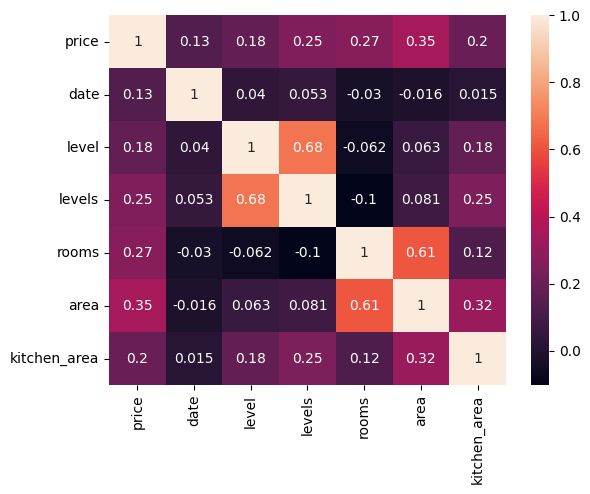

In [ ]:
sns.heatmap(moscow_df.drop(['building_type', 'object_type'], axis=1).corr(), annot=True)

Notably, `date` and `level` have a stronger correlation than from our 1000 samples, but each individual variable still does not have a strong enough correlation for prediction.

Thus, we proceed to fitting some models.

## Model Fitting

In [ ]:
from sklearn.model_selection import train_test_split

X = moscow_df[['date', 'building_type', 'level', 'levels', 'rooms', 'area', 'kitchen_area', 'object_type']]
y = moscow_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'{len(y_train)} train samples; {len(y_test)} test samples')

350134 train samples; 150058 test samples


Now, we will one-hot the categorical data using sklearn's one hot encoder.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

for col in ['building_type', 'object_type']:

    one_hot = OneHotEncoder()
    one_hot.fit(X_train[[col]])

    X_train.loc[:, one_hot.categories_[0]] = one_hot.transform(X_train[[col]]).todense()
    X_test.loc[:, one_hot.categories_[0]] = one_hot.transform(X_test[[col]]).todense()

    X_train = X_train.drop(col, axis=1)
    X_test = X_test.drop(col, axis=1)

X_train.sample(5)

,date,level,levels,rooms,area,kitchen_area,blocky,brick,monolithic,other,panel,wooden,new,preowned
853246,2018,13,25,1,23.60,6.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1563952,2019,3,17,0,28.10,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
700523,2018,8,13,3,88.90,20.3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
675539,2018,7,9,3,55.00,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4704006,2020,1,6,2,74.59,15.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Next, we will scale the data. Note that not all models require scaled data; while models like linear regression require scaling to avoid overemphasis of certain datapoints, models like descision trees (and, by extension, random forests) are not affected by unscaled variables.

It is also important to note that scaled data won't *negatively* impact descision trees, but we make a copy of scaled data to more explicitly demonstrate model understanding.

In [ ]:
from sklearn.preprocessing import StandardScaler

ordinal_cols = ['date', 'level', 'levels', 'rooms', 'area', 'kitchen_area']
X_train_ordinal, X_test_ordinal = X_train[ordinal_cols], X_test[ordinal_cols]

scaler = StandardScaler()
scaler.fit(X_train_ordinal)

X_train_scaled, X_test_scaled = X_train, X_test

X_train_scaled.loc[:, scaler.feature_names_in_] = scaler.transform(X_train_ordinal)
X_test_scaled.loc[:, scaler.feature_names_in_] = scaler.transform(X_test_ordinal)

X_train_scaled.sample(5)

,date,level,levels,rooms,area,kitchen_area,blocky,brick,monolithic,other,panel,wooden,new,preowned
2141800,-0.353996,-0.884442,0.170870,2.569099,2.184100,1.398355,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2378831,-0.353996,-0.359241,-1.046451,-0.905443,-0.336447,-0.060068,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1074221,-0.353996,2.616899,1.252933,-0.905443,-0.390404,0.363892,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1658420,-0.353996,-0.884442,0.576643,-0.905443,-0.710290,-0.365319,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5154699,1.920389,0.165960,0.576643,1.410918,1.089550,1.296605,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
MAX_EPOCHS = 10000

### Linear Regression

Note that SckiKit doesn't offer MAE loss for its `LinearRegression` implementation. However, `linear_model.SGDRegressor` can be made to use an MAE loss by using `epsilon_insensitive` loss and setting its $\epsilon$ hyperparam to $0$.

Note that this does mean we will be using SGD for descent, so our model will take more steps to converge and loss won't strcitly decrease, but in our case using SGD will actually be helpful since our dataset is relatively large, so each epoch will be much faster.

In [ ]:
from sklearn.linear_model import SGDRegressor

linreg_mae_model = SGDRegressor(loss='epsilon_insensitive', epsilon=0, max_iter=MAX_EPOCHS, verbose=1)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

linreg_mae_model.fit(X_train_scaled, y_train)

linreg_mae_train_preds = linreg_mae_model.predict(X_train_scaled)
linreg_mae_test_preds = linreg_mae_model.predict(X_test_scaled)

linreg_mae_train_mae = mean_absolute_error(y_train, linreg_mae_train_preds)
linreg_mae_test_mae = mean_absolute_error(y_test, linreg_mae_test_preds)

linreg_mae_train_mse = mean_squared_error(y_train, linreg_mae_train_preds)
linreg_mae_test_mse = mean_squared_error(y_test, linreg_mae_test_preds)

linreg_mae_train_rmse = np.sqrt(linreg_mae_train_mse)
linreg_mae_test_rmse = np.sqrt(linreg_mae_test_mse)

print(f'Linear Regression MAE train error: {linreg_mae_train_mae}, test error: {linreg_mae_test_mae}')
print(f'Linear Regression MSE train error: {linreg_mae_train_mse}, test error: {linreg_mae_test_mse}')
print(f'Linear Regression RMSE train error: {linreg_mae_train_rmse}, test error: {linreg_mae_test_rmse}')

To see full output, please check `model fitting - linreg, rf, xgboost.ipynb`. Truncated output is

```
Linear Regression MAE train error: 4563534.075553988, test error: 4566150.163515981
Linear Regression MSE train error: 41725770841577.31, test error: 31119599695421.977
Linear Regression RMSE train error: 6459548.810991161, test error: 5578494.393241063

```

after 10000 epochs, though convergence is not acheived by sklearn.

### Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_train_preds = rf_model.predict(X_train)
rf_test_preds = rf_model.predict(X_test)

rf_train_mae = mean_absolute_error(y_train, rf_train_preds)
rf_test_mae = mean_absolute_error(y_test, rf_test_preds)

rf_train_mse = mean_squared_error(y_train, rf_train_preds)
rf_test_mse = mean_squared_error(y_test, rf_test_preds)

rf_train_rmse = np.sqrt(rf_train_mse)
rf_test_rmse = np.sqrt(rf_test_mse)

print(f'Random Forest MAE train error: {rf_train_mae}, test error: {rf_test_mae}')
print(f'Random Forest MSE train error: {rf_train_mse}, test error: {rf_test_mse}')
print(f'Random Forest RMSE train error: {rf_train_rmse}, test error: {rf_test_rmse}')

Random Forest MAE train error: 414601.38323567127, test error: 872955.3757517842
Random Forest MSE train error: 3990371323394.1445, test error: 10943912536479.87
Random Forest RMSE train error: 1997591.380486546, test error: 3308158.481161365


### XGBoost Regression

In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.05)
xgb_model.fit(X_train, y_train)

xgb_train_preds = xgb_model.predict(X_train)
xgb_test_preds = xgb_model.predict(X_test)

xgb_train_mae = mean_absolute_error(y_train, xgb_train_preds)
xgb_test_mae = mean_absolute_error(y_test, xgb_test_preds)

xgb_train_mse = mean_squared_error(y_train, xgb_train_preds)
xgb_test_mse = mean_squared_error(y_test, xgb_test_preds)

xgb_train_rmse = np.sqrt(xgb_train_mse)
xgb_test_rmse = np.sqrt(xgb_test_mse)

print(f'XGBoost MAE train error: {xgb_train_mae}, test error: {xgb_test_mae}')
print(f'XGBoost MSE train error: {xgb_train_mse}, test error: {xgb_test_mse}')
print(f'XGBoost RMSE train error: {xgb_train_rmse}, test error: {xgb_test_rmse}')


XGBoost MAE train error: 1003653.7207931463, test error: 1011013.6295694831
XGBoost MSE train error: 15040078400422.973, test error: 5544151498929.8545
XGBoost RMSE train error: 3878153.9939026367, test error: 2354602.195473761


### Visualization

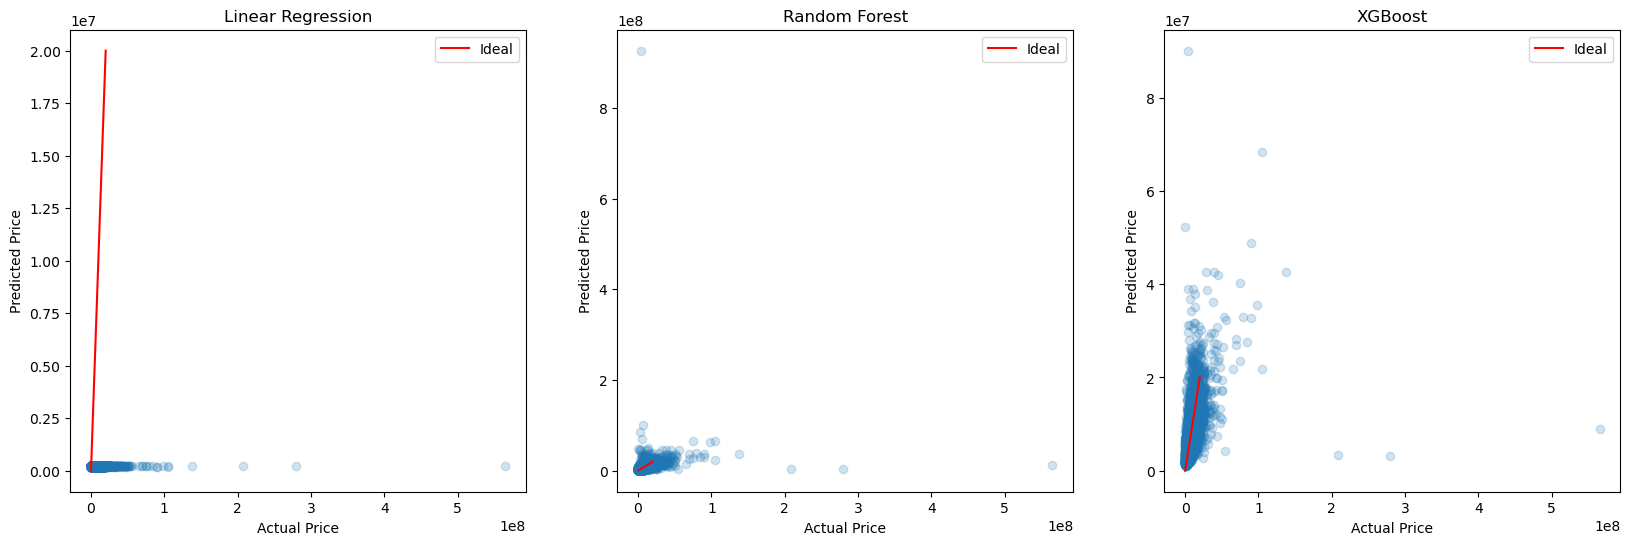

In [ ]:
plt.figure(figsize=(20, 6))

# Linear Regression
plt.subplot(131)
plt.scatter(y_test, linreg_mae_test_preds, alpha=0.2)
plt.plot([0, 2e7], [0, 2e7], 'r', label='Ideal')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression')
plt.legend()

# Random Forest
plt.subplot(132)
plt.scatter(y_test, rf_test_preds, alpha=0.2)
plt.plot([0, 2e7], [0, 2e7], 'r', label='Ideal')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest')
plt.legend()

# XGBoost
plt.subplot(133)
plt.scatter(y_test, xgb_test_preds, alpha=0.2)
plt.plot([0, 2e7], [0, 2e7], 'r', label='Ideal')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('XGBoost')
plt.legend()

plt.show()

# Ethics & Privacy

- The Russian economy is currently in a volatile position due to the war in Ukraine. If our model were to be used as a source of truth, and if it were too optimistic or pessimistic, we could wrongfully inflate the market or cause people to sell their homes for less than they are truly worth. Real estate investments can make or break one’s livelihood, especially in a turbulent and growing market like Russia, so making sure our model is functional and usable is important.
- The dataset doesn’t contain explicit personal information, but it contains information like date and time of listing publication and longitude/latitude location, which could potentially be used to identify individuals.
- The data is collected under specific legal provisions, which means it is collected lawfully, but it should be ensured that the use of this data for a machine learning project aligns with the original purpose of data collection.
- Any dataset has a potential for systematic biases, which could result in biased outcomes in a machine learning project. It is important to be aware of this and to either adjust the dataset to more fairly represent different groups or adjust the machine learning model to reduce bias in its prediction.


# Team Expectations 

Put things here that cement how you will interact/communicate as a team, how you will handle conflict and difficulty, how you will handle making decisions and setting goals/schedule, how much work you expect from each other, how you will handle deadlines, etc...
* Attend weekly meetings
* Do work in a timely manner
* If you need help or something comes up please message as soon as you can on Discord


# Project Timeline Proposal

Replace this with something meaningful that is appropriate for your needs. It doesn't have to be something that fits this format.  It doesn't have to be set in stone... "no battle plan survives contact with the enemy". But you need a battle plan nonetheless, and you need to keep it updated so you understand what you are trying to accomplish, who's responsible for what, and what the expected due dates are for each item.

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 5/9  |  8 PM |  Brainstorm topics/questions (all)  | Discuss and decide on final project topic, assign sections to group members| 
| 5/16  |  8 PM |  Assigned sections: <br/>Keri: Abstract/Problem Statement<br/>Cynthia: Background<br/>Ashley: Data<br/>Arth: Proposed Solution/Evaluation Metrics<br/> Wonjae: Ethics & Privacy | Review work for proposal due on Wednesday. Talk about checkpoint work and possible models to build | 
| 5/23 | 8 PM  | Start work on EDA for data and building the models| What the models represent and how to make the models better, and evaluation methods  |
| 5/30  | 8 PM  | Review findings for checkpoint turn in on wednesday | Start thinking about what needs to be done for the final project and if any changes need to be made for the models |
| 6/6  | 8 PM  | Finalize the models and testing | Discuss final project plans and any changes that need to be made, and further testing and evaluation of the models|
| 6/13  | 8 PM  | Final run through of information and dataset, make sure everything looks clean and ready to turn in. | Make sure everything looks good and everyone is satisfied with the results of the final project.

# Footnotes
<a name = "nahb"></a>1.[^](#nahb): Housing’s Contribution to Gross Domestic Product. https://www.nahb.org/news-and-economics/housing-economics/housings-economic-impact/housings-contribution-to-gross-domestic-product#:~:text=Share%3A,homes%2C%20and%20brokers'%20fees.<br> 
<a name="keyfactors"></a>2.[^](#keyfactors): Key Factors That Drive the Real Estate Market. https://www.investopedia.com/articles/mortages-real-estate/11/factors-affecting-real-estate-market.asp <br>
<a name="Redfin"></a>3.[^](#demographics): Is It Cheaper to Live in the City or the Suburbs?
. https://www.apartmenttherapy.com/suburbs-vs-city-cost-of-living-265646  <br>
<a name="Zestimate"></a>4.[^](#Zestimate): Building the Neural Zestimate
. https://www.zillow.com/tech/building-the-neural-zestimate/ <br>
<a name="Redfin"></a>5.[^](#Redfin): Redfin Estimate. https://www.redfin.com/redfin-estimate <br>

